In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('Books_Data_Clean.csv')

In [4]:
df

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.00,20496.000,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.50,7462.500,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.00,28677.000,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.00,24750.000,7.50,3,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.50,22771.500,7.99,4,Penguin Group (USA) LLC,4750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,1065,2014.0,Gray Mountain,John Grisham,eng,Intermediate,3.52,37379,nonfiction,104.94,62.964,0.99,1268,"Amazon Digital Services, Inc.",106
1066,1066,1989.0,The Power of One,Bryce Courtenay,eng,Excellent,4.34,57312,genre fiction,846.94,508.164,7.99,1270,Random House LLC,106
1067,1067,1930.0,The Maltese Falcon,Dashiell Hammett,eng,Intermediate,3.92,58742,genre fiction,846.94,508.164,7.99,1271,Hachette Book Group,106
1068,1068,2011.0,Night Road,Kristin Hannah,en-US,Excellent,4.17,58028,genre fiction,104.94,62.964,0.99,1272,"Amazon Digital Services, Inc.",106


# Analiza popularnosti žanrova
## Identifikacija najpopularnijih žanrova na osnovu ukupnog broja prodatih primeraka ili bruto prihoda

In [5]:
selected_columns = df[["genre","units sold","gross sales","publisher revenue"]]

In [6]:
selected_columns

,genre,units sold,gross sales,publisher revenue
0,genre fiction,7000,34160.00,20496.000
1,genre fiction,6250,12437.50,7462.500
2,genre fiction,5500,47795.00,28677.000
3,fiction,5500,41250.00,24750.000
4,genre fiction,4750,37952.50,22771.500
...,...,...,...,...
1065,nonfiction,106,104.94,62.964
1066,genre fiction,106,846.94,508.164
1067,genre fiction,106,846.94,508.164
1068,genre fiction,106,104.94,62.964


In [7]:
grouped_genre = selected_columns.groupby('genre').sum()

In [8]:
grouped_genre

,units sold,gross sales,publisher revenue
genre,,,
children,298118,13902.22,8341.332
fiction,545658,121831.13,68440.578
genre fiction,7875834,1622694.33,693682.620
nonfiction,1634759,228158.87,131846.172


In [9]:
#sortiranje rezultata prema ukupnom broju prodatih primeraka 
sorted_genre = grouped_genre.sort_values(by='units sold', ascending=False)

In [10]:
sorted_genre

,units sold,gross sales,publisher revenue
genre,,,
genre fiction,7875834,1622694.33,693682.620
nonfiction,1634759,228158.87,131846.172
fiction,545658,121831.13,68440.578
children,298118,13902.22,8341.332


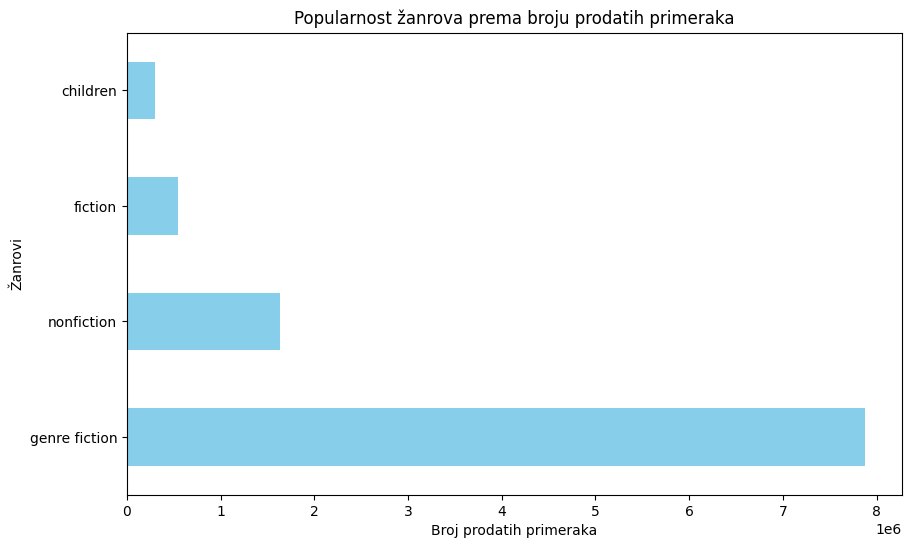

In [11]:
import matplotlib.pyplot as plt

sorted_genre['units sold'].plot(kind='barh', figsize=(10,6), color='skyblue')
plt.title('Popularnost žanrova prema broju prodatih primeraka')
plt.xlabel('Broj prodatih primeraka')
plt.ylabel('Žanrovi')
plt.show()

In [12]:
#+statisticka analiza
selected_columns.describe()

,units sold,gross sales,publisher revenue
count,1070.000000,1070.000000,1070.000000
mean,9676.980374,1856.622944,843.281030
std,15370.571306,3936.924240,2257.596743
min,106.000000,104.940000,0.000000
25%,551.250000,372.465000,0.000000
50%,3924.000000,809.745000,273.078000
75%,5312.250000,1487.957500,721.180500
max,61560.000000,47795.000000,28677.000000


# Autori sa najboljim ocenama
## identifikjemo autore sa najvećim prosečnim ocenama na osnovu knjiga koje su prodate

In [13]:
selected_df = df[["Author","Book_average_rating","units sold"]]
selected_df

,Author,Book_average_rating,units sold
0,"Unknown, Seamus Heaney",3.42,7000
1,"Frank Miller, David Mazzucchelli, Richmond Lew...",4.23,6250
2,Harper Lee,3.31,5500
3,David Sedaris,4.04,5500
4,Laini Taylor,4.04,4750
...,...,...,...
1065,John Grisham,3.52,106
1066,Bryce Courtenay,4.34,106
1067,Dashiell Hammett,3.92,106
1068,Kristin Hannah,4.17,106


In [16]:
grouped_authors = df.groupby('Author').agg({'Book_average_rating':'mean', 'units sold':'sum'}).reset_index()
grouped_authors

,Author,Book_average_rating,units sold
0,"A.A. Milne, Ernest H. Shepard",4.36,108
1,A.S.A. Harrison,3.30,28728
2,Abbi Glines,4.21,30782
3,Adam Johnson,4.06,4320
4,"Adam Mansbach, Ricardo CortÃ©s",4.26,2916
...,...,...,...
730,William Styron,4.18,4400
731,"Yana Toboso, Tomo Kimura",4.37,2889
732,Zadie Smith,3.75,4563
733,"Ø£Ø­Ù„Ø§Ù… Ù…Ø³ØªØºØ§Ù†Ù…ÙŠ, Ahlam Mosteghanemi",3.72,4320


In [17]:
sorted_authors = grouped_authors.sort_values(by='Book_average_rating', ascending=False)
sorted_authors

,Author,Book_average_rating,units sold
77,Bill Watterson,4.650,4536
78,"Bill Watterson, G.B. Trudeau",4.610,378
284,J.R.R. Tolkien,4.590,5022
232,George R.R. Martin,4.560,4280
621,Sarah J. Maas,4.526,66727
...,...,...,...
53,Audrey Niffenegger,3.230,4280
260,"Herman Koch, Sam Garrett",3.220,4590
538,P.D. James,3.210,107
642,Stephen Crane,3.210,108


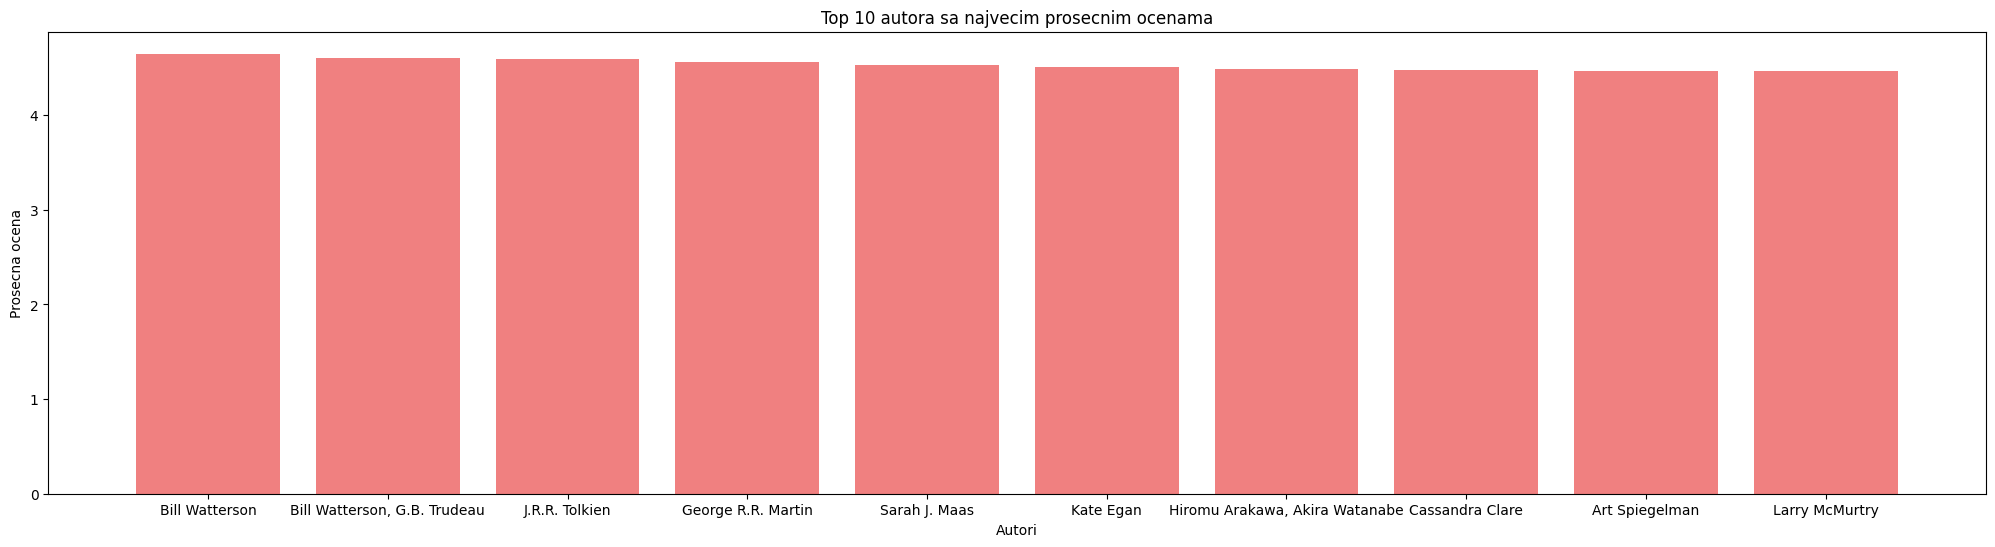

In [24]:
plt.figure(figsize=(25,6))
plt.bar(sorted_authors['Author'][:10], sorted_authors['Book_average_rating'][:10], color='lightcoral')
plt.title('Top 10 autora sa najvecim prosecnim ocenama')
plt.xlabel('Autori')
plt.ylabel('Prosecna ocena')
plt.show()

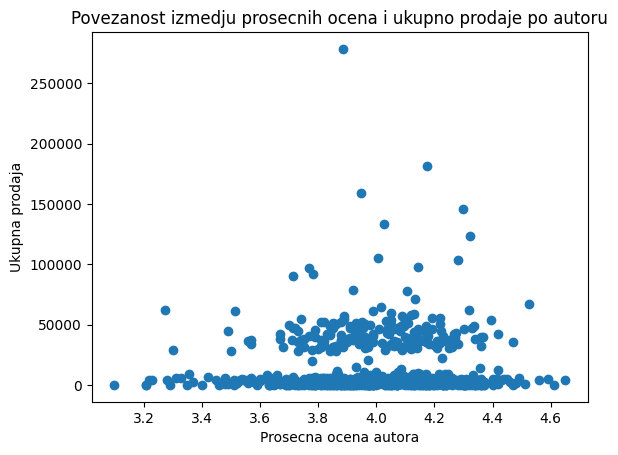

In [26]:
plt.scatter(sorted_authors['Book_average_rating'], sorted_authors['units sold'])
plt.title('Povezanost izmedju prosecnih ocena i ukupno prodaje po autoru')
plt.xlabel('Prosecna ocena autora')
plt.ylabel('Ukupna prodaja')
plt.show()

# Analiza po